Cargar Datos

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Datos/datos_entrenamiento_laboratorio1(train_data).csv')


Limpiar market_value

In [ ]:
df[['cantidad', 'sufijo']] = df['market_value'].replace({  '-': np.nan, "error": np.nan}, regex=True).str.extract(r'€?([\d\.]+)([mk]?)')
df['cantidad'] = df['cantidad'].astype(float)

df['precio_miles'] = df.apply(
    lambda row: row['cantidad'] * 1000 if row['sufijo'] == 'm' else row['cantidad'],
    axis=1
)

print(df.head())

null_counts = df.isnull().sum()
print(null_counts)

char = '-'
char_counts = df.apply(lambda col: col.astype(str).str.count(char).sum())
print(char_counts)

{'Goles': np.float64(0.5894665330112133), 'Tiros Totales': np.float64(0.009810353236055667), 'xG': np.float64(0.013941649968614632), 'npxG': np.float64(0.010181823385182745), 'xAG': np.float64(0.007332018126800281), 'xAG.1': np.float64(0.007332018126800281), 'Acciones_que_crean_tiros': np.float64(0.01120929157424597), 'Pases_intentados': np.float64(0.01754559036297606), 'Pases_intentados.1': np.float64(0.01754559036297606), 'Pases_intentados.2': np.float64(0.01754559036297606), 'Pases_progresivos': np.float64(0.016143818947260056), 'Pases_progresivos.1': np.float64(0.016143818947260056), 'Regates_exitosos': np.float64(0.006544725965318837), 'Regates_exitosos.1': np.float64(0.006544725965318837), 'Pases_medios_completados': np.float64(0.01763981538503822), 'Pases_largos_completados': np.float64(0.009422421283588844), 'xAG.2': np.float64(0.007332018126800281), 'xAG.3': np.float64(0.007332018126800281), 'xA': np.float64(0.006299264356172758), 'Pases_en_ultimo_tercio': np.float64(0.0114164

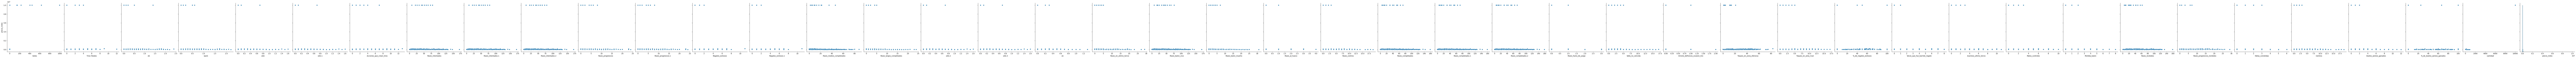

In [2]:
columnas = list(df.columns)
number_columns = df.select_dtypes(include=[np.number]).columns

sns.pairplot(df.sample(frac=0.2), height=5, y_vars="precio_miles", x_vars=number_columns, kind="scatter")

correlacion = {}
contador  = 0
for all in df.columns:
    if contador < 5:
        contador += 1
        continue

    if contador == 48:
        contador += 1
        break

    correlacion[all] = df['precio_miles'].corr(df[all])
    contador += 1

print(correlacion)



In [3]:
correlacion_ordenada = dict(sorted(correlacion.items(), key=lambda item: abs(item[1]), reverse=True))
print("Correlaciones ordenadas (de mayor a menor):")
for k, v in correlacion_ordenada.items():
    print(f"{k}: {v}")

Correlaciones ordenadas (de mayor a menor):
Goles: 0.5894665330112133
Pases_recibidos: 0.022305961645095344
Pases_balon_vivo: 0.020445558310070524
Pases_completados: 0.019978126589246404
Pases_completados.1: 0.019978126589246404
Pases_completados.2: 0.019978126589246404
Pases_medios_completados: 0.01763981538503822
Pases_intentados: 0.01754559036297606
Pases_intentados.1: 0.01754559036297606
Pases_intentados.2: 0.01754559036297606
Pases_progresivos: 0.016143818947260056
Pases_progresivos.1: 0.016143818947260056
xG: 0.013941649968614632
Toques_en_zona_ofensiva: 0.013155510512208719
Pases_en_ultimo_tercio: 0.011416429991869353
Acciones_que_crean_tiros: 0.01120929157424597
Toques_en_area_rival: 0.010977762427292892
Pases_balon_muerto: -0.010693033399804392
npxG: 0.010181823385182745
Tiros Totales: 0.009810353236055667
Pases_largos_completados: 0.009422421283588844
Perdida_balon: 0.009270660274805307
xAG: 0.007332018126800281
xAG.1: 0.007332018126800281
xAG.2: 0.007332018126800281
xAG.3: 0